# Taller 5: Extracción de Características
Hecho por:
Marcos Alfredo Fierro Sarria,
Gustavo Adolfo Ropero Bastidas, 
Andrés Camilo Apráez Zamora

In [230]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

"""""
Hecho por:
Marcos Alfredo Fierro Sarria,
Gustavo Adolfo Ropero Bastidas, 
Andrés Camilo Apráez Zamora
"""""


def calcular_histogramas_color(imagen):
    # Convertir la imagen a RGB (OpenCV carga la imagen en formato BGR)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Calcular el histograma de color para cada canal (rojo, verde, azul)
    histograma_r = cv2.calcHist([imagen_rgb], [0], None, [256], [0, 256]).flatten()
    histograma_g = cv2.calcHist([imagen_rgb], [1], None, [256], [0, 256]).flatten()
    histograma_b = cv2.calcHist([imagen_rgb], [2], None, [256], [0, 256]).flatten()

    print("tipos: " , type(histograma_r), type(histograma_g), type(histograma_b))    
    histograma_concatenado = np.concatenate((histograma_r, histograma_g, histograma_b))

    return histograma_concatenado



In [231]:


def calcular_descriptores_textura(imagen):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Calcular el histograma de niveles de grises
    hist = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])
    
    # Normalizar el histograma
    hist_norm = hist.flatten() / np.sum(hist)
    print("tipo: ", type(hist_norm))
    return hist_norm



In [232]:
def calcular_caracteristicas_momentos_hu(imagen):
    # Convertir la imagen a escala de grises si es necesario
    if len(imagen.shape) > 2:
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    else:
        imagen_gris = imagen
    
    # Calcular los momentos de la imagen
    momentos = cv2.moments(imagen_gris)
    
    # Calcular los momentos de Hu
    momentos_hu = cv2.HuMoments(momentos)
    
    # Normalizar los momentos de Hu para hacerlos invariantes a la escala y la rotación
    momentos_hu_normalizados = -np.sign(momentos_hu) * np.log10(np.abs(momentos_hu))
    
    # Aplanar los momentos de Hu normalizados en un vector de características
    vector_caracteristicas = momentos_hu_normalizados.flatten()
    print("vect mont type: ", type(vector_caracteristicas))
    return vector_caracteristicas

In [233]:
def combinar_vectores_caracteristicas(vectores_caracteristicas):
    # Encontrar la longitud máxima de los vectores
    max_length = max(len(vector) for vector in vectores_caracteristicas)
    
    # Rellenar los vectores más cortos con ceros
    vectores_rellenados = [np.pad(vector, (0, max_length - len(vector))) for vector in vectores_caracteristicas]
    
    # Combinar los vectores de características
    vector_combinado = np.vstack(vectores_rellenados).T  # Transponer para obtener la forma correcta
    
    return vector_combinado

In [234]:
def aplicar_pca(vectores_combinados, porcentaje_varianza=0.95):
    # Inicializar PCA con el porcentaje de varianza deseado
    pca = PCA(n_components=porcentaje_varianza)
    
    # Aplicar PCA a los vectores combinados
    vectores_pca = pca.fit_transform(vectores_combinados)
    
    # Mostrar la varianza explicada por cada componente principal
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
    plt.xlabel('Componente Principal')
    plt.ylabel('Varianza Explicada')
    plt.title('Varianza Explicada por Componente Principal')
    plt.show()
    
    # Graficar los datos en el espacio de las dos primeras componentes principales
    plt.figure(figsize=(10, 6))
    plt.scatter(vectores_pca[:, 0], vectores_pca[:, 1], alpha=0.5)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Visualización de Datos en el Espacio PCA')
    plt.show()
    
    # Devolver los vectores transformados por PCA
    return vectores_pca


In [235]:
# Ruta de la carpeta de imágenes

ruta_carpeta = r'fruitsImages'

# Lista para almacenar las imágenes preprocesadas
imagenes_preprocesadas = []

# Recorrer las imágenes de la carpeta
for archivo in os.listdir(ruta_carpeta):
  # Leer la imagen
    imagen_original = cv2.imread(os.path.join(ruta_carpeta, archivo))
    if imagen_original is not None:
        imagenes_preprocesadas.append(imagen_original)
# Mostrar las imágenes preprocesadas 
num_imagenes = len(imagenes_preprocesadas)
num_filas = (num_imagenes + 1) // 2
plt.figure(figsize=(10, 5*num_filas))

for i, img in enumerate(imagenes_preprocesadas):
    color = calcular_histogramas_color(img)
    print("Histograma de color - Rojo:", color)
   
    vector_textura = calcular_descriptores_textura(img)
    print("Vector de descriptores de textura:", vector_textura)
    vector_caracteristicas = calcular_caracteristicas_momentos_hu(img)
    print("Vector de características basado en los momentos de Hu:")
    print(vector_caracteristicas)
plt.subplots_adjust(wspace=0.5)
plt.show()

tipos:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Histograma de color - Rojo: [1.11000e+02 1.04200e+03 5.38300e+03 2.34810e+04 5.41740e+04 7.31830e+04
 7.59470e+04 6.87020e+04 5.52630e+04 4.60080e+04 4.01460e+04 3.60310e+04
 3.36260e+04 3.12760e+04 3.04770e+04 2.94030e+04 2.89590e+04 2.85320e+04
 2.82390e+04 2.72620e+04 2.68210e+04 2.60750e+04 2.50090e+04 2.46970e+04
 2.40630e+04 2.32950e+04 2.28740e+04 2.29540e+04 2.30730e+04 2.34010e+04
 2.42120e+04 2.45680e+04 2.58970e+04 2.74200e+04 2.88080e+04 3.06680e+04
 3.27230e+04 3.45210e+04 3.67610e+04 3.91140e+04 4.19750e+04 4.50710e+04
 4.75940e+04 5.14700e+04 5.43440e+04 5.89530e+04 6.33180e+04 6.80030e+04
 7.37810e+04 7.95380e+04 8.42270e+04 8.81830e+04 8.99240e+04 8.99180e+04
 8.89840e+04 8.45340e+04 8.07680e+04 7.51670e+04 7.06000e+04 6.57440e+04
 6.10240e+04 5.67710e+04 5.34670e+04 5.05180e+04 4.81540e+04 4.61570e+04
 4.40790e+04 4.33980e+04 4.21350e+04 4.09310e+04 3.99350e+04 3.85990e+04
 3.82430e+04 3.7

<Figure size 1000x11000 with 0 Axes>

In [236]:
def concatenar_vectores_como_tuplas(vector1, vector2, vector3):
    # Convertir los vectores en tuplas
    tupla1 = tuple(vector1)
    tupla2 = tuple(vector2)
    tupla3 = tuple(vector3)
    tupla_concatenada = tupla1 + tupla2 + tupla3
    return tupla_concatenada

tipos:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
tipo:  <class 'numpy.ndarray'>
vect mont type:  <class 'numpy.ndarray'>
tipos:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
tipo:  <class 'numpy.ndarray'>
vect mont type:  <class 'numpy.ndarray'>
tipos:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
tipo:  <class 'numpy.ndarray'>
vect mont type:  <class 'numpy.ndarray'>
tipos:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
tipo:  <class 'numpy.ndarray'>
vect mont type:  <class 'numpy.ndarray'>
tipos:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
tipo:  <class 'numpy.ndarray'>
vect mont type:  <class 'numpy.ndarray'>
tipos:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
tipo:  <class 'numpy.ndarray'>
vect mont type:  <class 'numpy.ndarray'>
tipos:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
tipo:  <

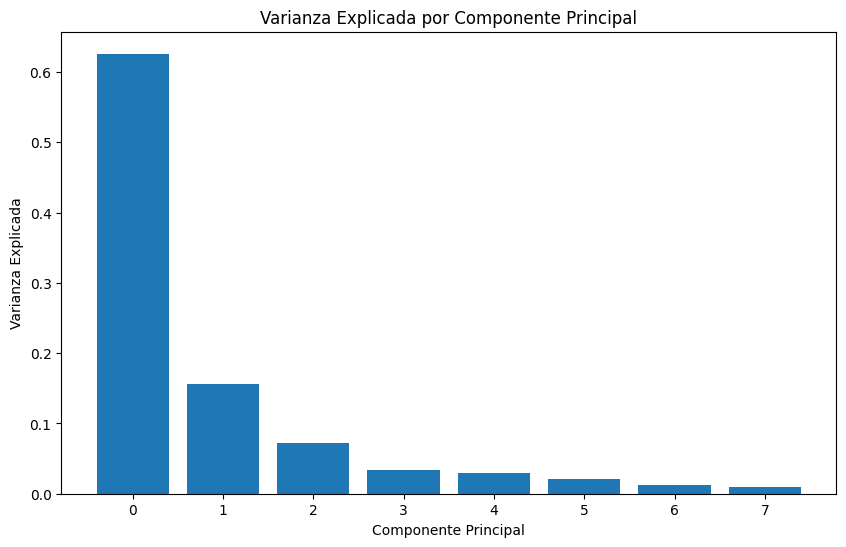

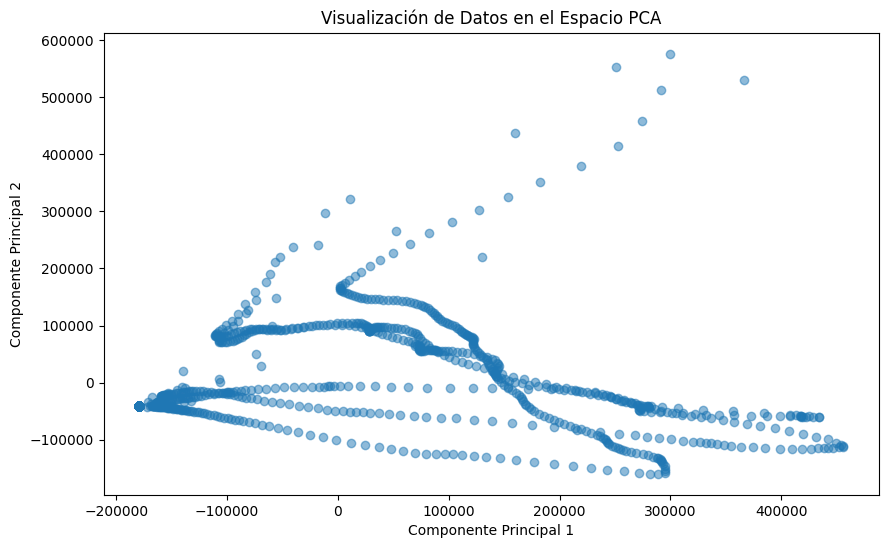

In [237]:
ruta_carpeta = r'fruitsImages'

# Lista para almacenar las tuplas de características por imagen
tuplas_caracteristicas_por_imagen = []

# Recorrer las imágenes de la carpeta
for archivo in os.listdir(ruta_carpeta):
    # Leer la imagen
    imagen = cv2.imread(os.path.join(ruta_carpeta, archivo))
    if imagen is not None:
        # Calcular histogramas de color
        vector_histograma_color = calcular_histogramas_color(imagen)
        # Calcular descriptores de textura
        vector_textura = calcular_descriptores_textura(imagen)
        # Calcular momentos de Hu
        vector_momentos_hu = calcular_caracteristicas_momentos_hu(imagen)
        # Concatenar los vectores como tuplas
        tupla_caracteristicas = concatenar_vectores_como_tuplas(vector_textura, vector_momentos_hu, vector_histograma_color)
        
        # Agregar la tupla de características a la lista
        tuplas_caracteristicas_por_imagen.append(tupla_caracteristicas)

# Combinar los vectores de características
vectores_combinados = combinar_vectores_caracteristicas(tuplas_caracteristicas_por_imagen)

# Aplicar PCA a los vectores combinados
vectores_pca = aplicar_pca(vectores_combinados)


xd 43
tupla caraact for image [(0.0, 0.0, 5.1364236e-07, 2.0648422e-05, 0.00022507807, 0.0009132561, 0.0037853385, 0.008668022, 0.010464333, 0.0084830085, 0.0063038296, 0.0048537147, 0.0040035336, 0.0035365303, 0.0033642545, 0.0032603962, 0.003160955, 0.0031026052, 0.003005013, 0.0029243713, 0.002785996, 0.0027499383, 0.0025762245, 0.002492501, 0.0024286038, 0.0022753328, 0.0021941774, 0.0021445595, 0.0020744987, 0.0020831279, 0.0021365467, 0.0021537023, 0.0022655737, 0.0024253165, 0.0025173612, 0.0026968278, 0.0029052638, 0.0031373275, 0.003399285, 0.0036904174, 0.003986789, 0.0043543517, 0.004744103, 0.0052040187, 0.0057459115, 0.0061907256, 0.0067844964, 0.0073688156, 0.008079594, 0.008731612, 0.009378082, 0.009807076, 0.009984077, 0.010009759, 0.009747185, 0.009360412, 0.008932549, 0.008381924, 0.007737611, 0.0071343896, 0.0065334276, 0.0060318047, 0.0055314144, 0.0051310817, 0.004838511, 0.004587648, 0.004460059, 0.004361337, 0.0043747947, 0.0042962073, 0.0042049843, 0.004098455, 

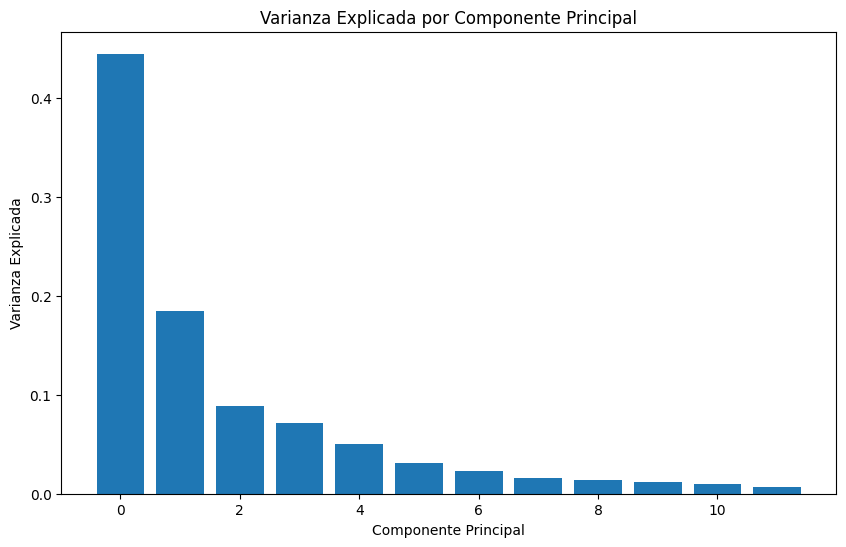

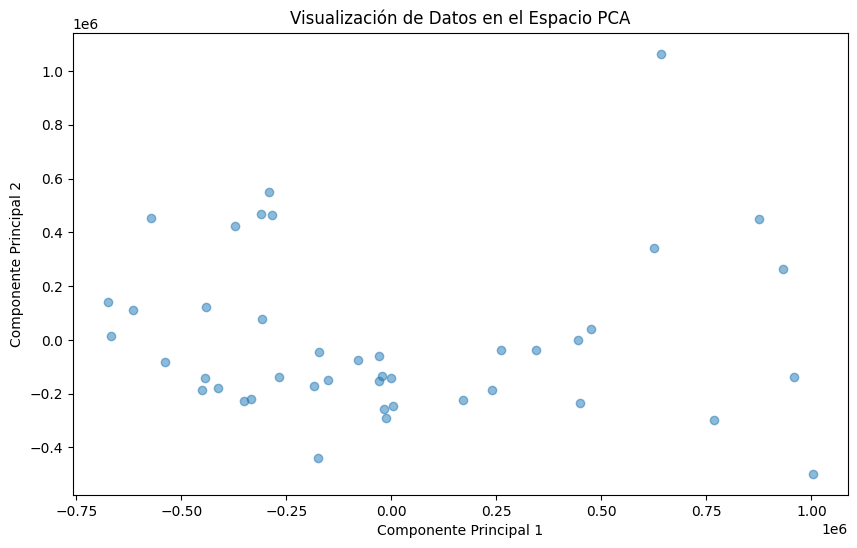

In [238]:
print("xd", len( tuplas_caracteristicas_por_imagen))

print("tupla caraact for image", tuplas_caracteristicas_por_imagen)
vectores_combinados = np.array(tuplas_caracteristicas_por_imagen)
vectores_pca = aplicar_pca(vectores_combinados)

